# Understanding (Stochastic) Gradient Descent (GD) through NL regression
---

In the following notebook, we are going to implement a Gradient Descent minimization from scratch in order to understand in a very succint manner what powers most of the popular Machine Learning frameworks (tensorflow, pytorch, etc.).

### **GD in a nutshell**

<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ..., n <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; choose $\alpha_k$ to minimize $f(x_k+\alpha_k s_k)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha_k s_k$ <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

In [1]:
# Import various libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec

from scipy import stats
from scipy.optimize import fmin

%matplotlib inline

In [2]:
!wget -q --show-progress 'https://raw.githubusercontent.com/Radonirinaunimi/ml4nikhef/main/SGD/rawdata/dummy_data.txt' -O dummy_data.txt

dummy_data.txt      100%[===================>]     293  --.-KB/s    in 0s      


As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

In [3]:
# Implementation of the function f
f = lambda x: pow(x, 3) - 2 * pow(x, 2) + 2

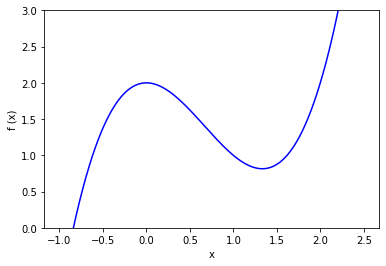

In [4]:
# Plot the function for a given x range
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f(x), label="f(x)", c="b")
plt.xlabel(r"x")
plt.ylabel(r"f (x)")
plt.ylim(bottom=0, top=3)
plt.show()

We can see from plot above that our local minimum is gonna be near $x \sim 1.5$, but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$.


---

**Question 1** 

Find the minimum of the function above with a precision of $10^{-4}$ by completing the following points:


*   Implement a function that computes the derivative of $f(x)$
*   Write out the gradient descent algorithm into the function below using the algorithm above with $\alpha_k = 0.1$
*   What is the value at which the minimum occurs?



---

In [5]:
# Replace None with the derivative of f
f_prime = lambda x: 3 * pow(x, 2) - 4 * x

In [6]:
# Function that computes the Gradient Descent
def gradient_descent(x_old, x_new, a_k=0.1, precision=1e-4):
  """
  Computes the GD of a 1-dimensional function.

  Parameters:
  -----------
  x_old: float
    initial x_0 value
  x_new: float
    reference value
  a_k: float
    step size
  precision: float
    accuracy of the minimization
  
  Returns:
  --------
  tuple(list, list)
    Lists of the covered x and y values
  """
  x_list, y_list = [x_new], [f(x_new)]

  # Complete the function ...
  while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + a_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
  
  return x_list, y_list

In [7]:
# Input values
x_old = 0
x_new = 2

# Evaluate the GD with the above initial values
x_results, y_results = gradient_descent(x_old, x_new)

In [8]:
print(f"The minimum is found at x={x_results[-1]} with {len(x_results)} steps.")

The minimum is found at x=1.3334253508453249 with 17 steps.


In [9]:
# x ranges to plot the path
x_ranges = [[-1, 2.5], [1.2, 2.1], [1.333, 1.335]]

# Plot the path that was taken to find the local minimum
def plot_path(x_results, y_results, x_ranges=x_ranges):
  nb_zoom = len(x_ranges)
  plt.figure(figsize=(5 * nb_zoom, 3.5))
  gs = gridspec.GridSpec(1, nb_zoom)

  for idx, x_range in enumerate(x_ranges):
    ax = plt.subplot(gs[idx])
    ax.scatter(x_results, y_results, c="r")
    ax.plot(x, f(x), c="b")
    ax.set_xlim(x_range)
    ax.set_ylim(bottom=0, top=3)
  plt.show()

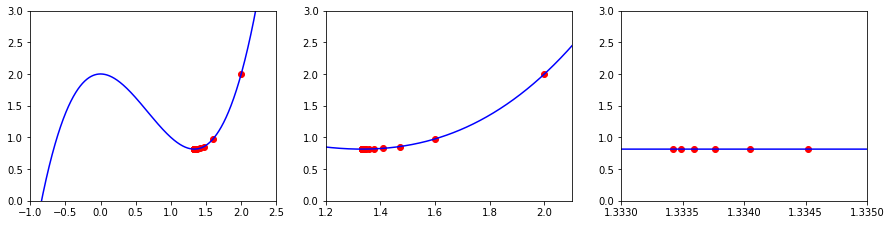

In [10]:
plot_path(x_results, y_results)

---

**Question 2**

Play a bit with the step size and the precision by choosing different values. What do you notice?

---

From the previous question, you should have noticed that the choice of step size greatly influences the search for the local minimum. If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

## **Adaptive learning rate**

In order to improve the convergence (search for the local minimum), we can adaptively modify the value of the learning rate during the iterations.

### **(1) Time-decaying learning rate**

One approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time: $\eta(t+1) = \eta(t) / (1+t \times d)$.

---

**Question 3**

Implement the above time-decaying learning rate in the function below by choosing $d=1$ and $t_0 = 0$. How many steps was required in order to find the local minimum?

---

In [11]:
# Function that computes the Gradient Descent with decaying LR
def gradient_descent_decay_lr(x_old, x_new, a_k=0.17, precision=1e-4):
  """
  Computes the GD of a 1-dimensional function.

  Parameters:
  -----------
  x_old: float
    initial x_0 value
  x_new: float
    reference value
  a_k: float
    step size
  precision: float
    accuracy of the minimization
  
  Returns:
  --------
  tuple(list, list)
    Lists of the covered x and y values
  """
  t, d = 0, 1
  x_list, y_list = [x_new], [f(x_new)]

  # Complete the function ...
  while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + a_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    a_k = a_k / (1 + t * d)
    t += 1
  
  return x_list, y_list

In [12]:
# Evaluate the GD with the above initial values
x_results, y_results = gradient_descent_decay_lr(x_old, x_new)
print(f"The minimum is found at x={x_results[-1]} with {len(x_results)} steps.")

The minimum is found at x=1.3308506740900838 with 6 steps.


### **(2) Relying on built-in libraries**

Our implementation above is fine but not good enough for most of machine learning applications. There exists so far advanced machine learning frameworks that implement efficient learning rate updates. For the sake of comparison and simplicity, here we `scipy` package to find the ideal learning during the iterations.

In [13]:
# Implement a wrapper function to pass to scipy
def f_wrapper(n, x, s):
  x += n * s
  return f(x)

# Function that computes the Gradient Descent using scipy 
def gradient_descent_scipy(x_old, x_new, precision=1e-4):
  """
  Computes the GD of a 1-dimensional function.

  Parameters:
  -----------
  x_old: float
    initial x_0 value
  x_new: float
    reference value
  precision: float
    accuracy of the minimization
  
  Returns:
  --------
  tuple(list, list)
    Lists of the covered x and y values
  """
  x_list, y_list = [x_new], [f(x_new)]

  # Complete the function ...
  while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # Use scipy.fmin to search for best
    # learning rate
    a_k = fmin(
        f_wrapper,
        0.1,
        (x_old,s_k), 
        full_output=False,disp=False
    )

    x_new = x_old + a_k * s_k
    x_list.append(float(x_new))
    y_list.append(float(f(x_new)))
  
  return x_list, y_list

In [14]:
# Evaluate the GD with the above initial values
x_results, y_results = gradient_descent_scipy(x_old, x_new)
print(f"The minimum is found at x={x_results[-1]} with {len(x_results)} steps.")

The minimum is found at x=1.3325186782226632 with 3 steps.


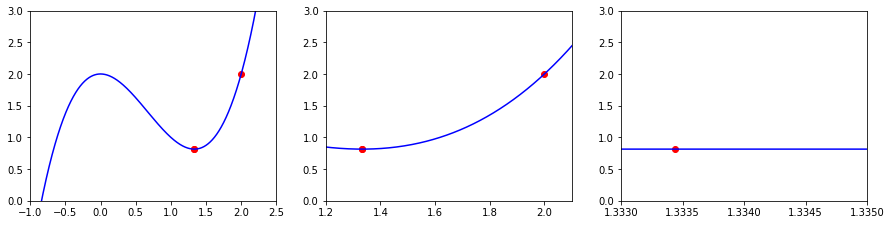

In [15]:
plot_path(x_results, y_results)

## **More interesting local minimul Search**

Let's now consider an example which is a little bit more complicated. Consider a simple linear regression where we want to see how the temperature affects the noises made by crickets. We have a data set of cricket chirp rates at various temperatures.

In [16]:
# Load the dummy datasets
data = np.loadtxt('dummy_data.txt', delimiter=',')
x = data[:, 0]
y = data[:, 1]
m = len(x)

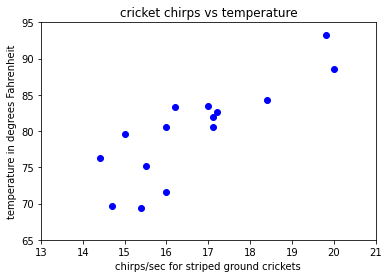

In [17]:
# Plot the dummy datasets
def plot_crickets_noise(x, y):
  plt.scatter(x, y, marker='o', c='b')
  plt.title('cricket chirps vs temperature')
  plt.xlabel('chirps/sec for striped ground crickets')
  plt.ylabel('temperature in degrees Fahrenheit')
  plt.xlim([13,21])
  plt.ylim([65,95])
  plt.show()

plot_crickets_noise(x, y)

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is:

$$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$$

The above function looks very similar to the Mean Squared Error (MSE). However, since this function depends on two variables, our gradient will be defined in two dimensions:

$$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$$

---

**Question 4**

Given the above formulae, implement below the functions that compute the gradient of the function $J$.

---

In [18]:
# Construct the straight line function
h = lambda x, theta_0, theta_1: theta_0 + x * theta_1

# Replace the None below with the actual expressions
def J(x, y, theta_0, theta_1):
  """
  Returns
  -------
  int:
    J value for given theta's
  """
  summed = np.sum(pow(h(x, theta_0, theta_1) - y, 2))
  return summed / (2 * m)

def grad_J(x, y, theta_0, theta_1):
  """
  Returns
  -------
  tuple(dJ_d0, dJ_d1):
    values of the gradients
  """
  dJ_d0 = np.sum((h(x, theta_0, theta_1) - y))
  dJ_d1 = np.sum(x * (h(x, theta_0, theta_1) - y))
  return np.array([dJ_d0, dJ_d1]) / m

In [19]:
def nonadaptive_gd(theta_old, theta_new, a_k=1e-3, precision=1e-3):
  number_steps = 0
  s_k = float("inf")
  while np.linalg.norm(s_k) > precision:
    number_steps += 1
    theta_old = theta_new
    s_k = -grad_J(x,y,theta_old[0],theta_old[1])
    theta_new = theta_old + a_k * s_k

  return number_steps, theta_new

In [20]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.])

nb_steps, theta_results = nonadaptive_gd(theta_old, theta_new)

In [21]:
print("Local minimum occurs where:")
print(f"\t theta_0={theta_results[0]}")
print(f"\t theta_1={theta_results[1]}")
print(f"It took {nb_steps} steps to converge")

Local minimum occurs where:
	 theta_0=25.12855255859539
	 theta_1=3.2972647562518955
It took 565859 steps to converge


For comparison, let's get the actual values for $\theta_0$ and $\theta_1$ using a built-in function from `scipy`:

In [22]:
actualvalues = stats.linregress(x,y)
scipy_theta_0 = actualvalues.intercept
scipy_theta_1 = actualvalues.slope
print("Actual values for theta are:")
print(f"\t theta_0={scipy_theta_0}")
print(f"\t theta_1={scipy_theta_1}")

Actual values for theta are:
	 theta_0=25.232304983426026
	 theta_1=3.2910945679475647


So we see that our values are relatively close to the actual values (even though our method was pretty slow). If you look at the source code of [linregress](https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py), it uses the convariance matrix of x and y to compute fastly. Below, you can see a plot of the line drawn with our theta values against the data:

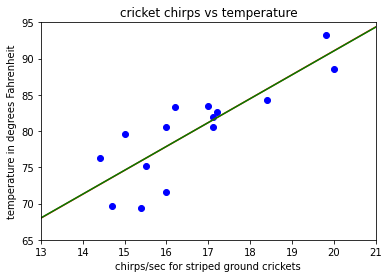

In [23]:
xx = np.linspace(0, 21, 1000)
plt.scatter(x, y, marker='o', c='b')
plt.plot(xx, h(xx, theta_results[0], theta_results[1]), label='custom', c='r')
plt.plot(xx, h(xx, scipy_theta_0, scipy_theta_1), label='custom', c='g', ls='-')
plt.xlim([13,21])
plt.ylim([65,95])
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.show()

Notice that in the method above we need to calculate the gradient in every step of our algorithm. In the example with the crickets where we only have 15 datapoints, this is not a big deal. But imagine that we had 10 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

## **Stochastic Gradient Descent**

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

$$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$$

Where $h_\theta(x) = \theta_0 + \theta_1 x$

Then we followed this algorithm (where $\alpha$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \alpha s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 15 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\ 
 \end{bmatrix}-\alpha\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate <i>near</i> a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size $\alpha$ as the algorithm runs.

Let's look at another example where we illustrate the use of stochastic gradient descent for linear regression. In the example below, we'll create a set of 500,000 points around the line $y = 2x+17+\epsilon$, for values of x between 0 and 100:

In [24]:
f = lambda x: 2 * x + 17 + 10 * np.random.randn(len(x))

x = 100 * np.random.random(500000)
y = f(x) 
m = len(y)

First, let's randomly shuffle around our dataset. Note that in this example, this step isn't strictly necessary since the data is already in a random order. However, that obviously may not always be the case:

In [25]:
from random import shuffle

x_shuf = []
y_shuf = []
index_shuf = list(range(len(x)))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])

x = x_shuf
y = y_shuf

Now we'll setup our $h$ function and our cost function, which we will use to check how the value is improving.

In [26]:
cost = lambda theta_0, theta_1, x_i, y_i: 0.5 * pow(h(x_i, theta_0, theta_1) - y_i, 2)

Now we'll run our stochastic gradient descent algorithm. To see it's progress, we'll take a cost measurement at every step. Every 10,000 steps, we'll get an average cost from the last 10,000 steps and then append that to our cost_list variable. We will run through the entire list 10 times here:

In [27]:
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.000005                # step size

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

loops = 10

for j in range(loops):
    for i in range(m):
        iter_num += 1
        theta_old = theta_new
        s_k[0] = (h(x[i], theta_old[0], theta_old[1]) - y[i])
        s_k[1] = (h(x[i], theta_old[0], theta_old[1]) - y[i]) * x[i]
        s_k = (-1) * s_k
        theta_new = theta_old + n_k * s_k
        sum_cost += cost(theta_old[0],theta_old[1],x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000.0)
            sum_cost = 0

In [28]:
print("Local minimum occurs where:")
print(f"\t theta_0={theta_new[0]}")
print(f"\t theta_1={theta_new[1]}")

Local minimum occurs where:
	 theta_0=16.968895182461566
	 theta_1=1.9823352472822395


As you can see, our values for $\theta_0$ and $\theta_1$ are close to their true values of 17 and 2.

Now, we plot our cost versus the number of iterations. As you can see, the cost goes down quickly at first, but starts to level off as we go through more iterations.

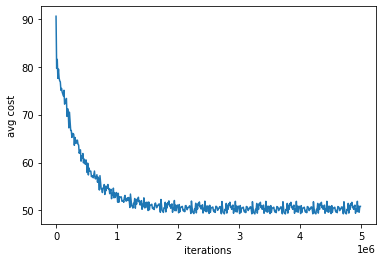

In [29]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.xlabel("iterations")
plt.ylabel("avg cost")
plt.show()

---

**Question 5**

Play with the above using dynamical learning rate. Does the convergence improve?

---